# 위스콘신 유방암 데이터 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import time

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
cancer = load_breast_cancer()

In [5]:
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [6]:
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 보팅 분류기 Voting Classifer 

### 소프트 보팅 Soft Voting 
분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정 

In [44]:
# 로지스틱 회귀 + KNN
lr_clf = LogisticRegression(solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

In [45]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현 
vo_clf = VotingClassifier(estimators = [('LR', lr_clf) ,
                                       ('KNN', knn_clf)], voting = 'soft')

In [8]:
X_train, X_test, y_train, y_test  = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

In [52]:
# 학습 및 결과
vo_clf.fit(X_train, y_train)

pred = vo_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

In [53]:
# 개별 모델 평가 
classifiers = [lr_clf, knn_clf]

for classifier in classifiers : 
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


## 랜덤 포레스트 Random Forest
여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측을 결정 

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_clf = RandomForestClassifier(random_state = 156)

In [57]:
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

accuracy_score(y_test, pred)

0.9473684210526315

#### 랜덤 포레스트 하이퍼 파라미터 및 튜닝 
- n_estimator : 랜덤포레스트의 결정 트리의 개수 지정, default = 10,   
                많이 설정할수로고 좋은 성능을 기대할 수 있으나, 과대 적합 가능성 존재.  
                또한 늘릴 수록 학습 수행 시간이 오래걸린 것도 감안해야 함 
- max_features : 랜덤포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처개수)만큼 참조 
- max_depth
- min_sample_leaf 

## GBM ( Gradient Boosting Machine )

부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가주치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.   
대표적으로 `AdaBoost(Adaptive Boosting)` 과 `그래디언트 부스트`가 있음.

GBM은 가중치 업데이트를 경사하강법 Gradient Descent 을 이용하는 것이 AdaBoost와의 차이.   
* 경사하강법 : 오류식 `h(x) = y - F(x)` 를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것. 

In [7]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [10]:
start_time = time.time()
gb_clf = GBC(random_state =0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간 : {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도 : 0.9561
GBM 수행시간 : 0.5 초


#### GBM의 하이퍼 파라미터 및 튜닝 
* loss : 경사하강법에서 사용힐 비용 함수, 기본값 = 'deviance'
* learning_rate : 학습을 진행할 때마다 작용하는 학습률  
* n_estimator : weak_learner 의 개수 
* subsample : weak_learner가 학습에 상요하는 데이터 샘플링 비율 
             과적합이 우려되는 경우 1보다 작은 값으로 설정 

## XGBoost ( eXtra Gradient Boost )
GBM의 단점인 느린 수행 시간과 과적합 규재 부재 등의 문제를 해결함.  

In [12]:
# Xgboost 설치 

# !pip install xgboost
# !brew install libomp

In [18]:
import xgboost as xgb 
from xgboost import XGBClassifier

#### XGBoost 하이퍼 파라미터 및 튜닝 

주요 일반 파라미터 
* booser : gbtree / gblinear 선택 
* silent :  출력 메세지 표시 여부 , 나타내고 싶지 않을 때 = 1
* nthread : CPU의 실행 스레드 개수 조정
            멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU를 사용해 ML 애플리케이션을 구동하는 경우에 변경 

주요 부스터 파라미터 
* eta : GBM의 학습률 defult = 0.3
* num_boost_rounds : GBM의 n_estimators 
* min_child_weight : GBM의 min_child_leaf와 유사함. 과적합을 조절하기 위해 사용. 
* gamma : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값 
* max_depth : 트리 기반 알고리즘의 max_depth 와 동일. 0을 지정하면 깊이에 제한이 없음. 
* sub_sample : GBM의 subsample과 동일. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율 지정. 
* colsample_bytree : GBM의 max_features와 유사. 트리 생성에 필요한 피터를 임의로 샘플링하는 데 사용. 
                    매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용
* lambda : L2 Regularization 적용 값.  피터 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과가 있음. 
* alpha : L1 Regularization 적용 값. 
* scale_pos_weight : 특정값을 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터 

학습 태스크 파라미터 
* objective : 손실함수 정의 
    - binary:logistic : 이진 분류일 때 
    - multi:softmax : 다중 분류일 때, 해당 손실함수를 사용할 경우 레이블 클래스 개수인 num_class 파라미터를 지정해주어야 함 
    - multi:softprob : multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률의 반환 
    
    
* eval_metrc : 검증에 사용되는 함수 정의
               defalut는 회귀의 경우 rmse, 분류의 경우 error
    - rmse : Root Mean Square Error
    - mae : Mean Absolute Error
    - logloss : Negative log-likelihood
    - error : Binary classification error rate(0.5 threshold)
    - merror : Multiclass classification error rate 
    - mlogloss : Multiclass logloss
    - auc : Area under the curve 

In [20]:
y_label = cancer.target

In [23]:
data_df['target'] = y_label

In [24]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
data_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [26]:
X_train.shape

(455, 30)

In [27]:
X_test.shape

(114, 30)

#### DMatrix

Python 래퍼 XGBoost는 학습용와 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성.  
주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost 만의 전용 데이터 세트

- data : 피처 데이터 세트
- label : 종속값의 데이터 세트 

In [28]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [29]:
params = {'max_depth' : 3,
         'eta':0.1,
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings':100}

num_rounds = 400

early_stoppings 옵션을 지정하기 위해선 eval_set와 eval_metric 옵션이 함께 설정되어야 함 

In [30]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]

In [31]:
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                     evals = wlist)

[15:47:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.

In [32]:
pred_probs = xgb_model.predict(dtest)

print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]


In [33]:
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 : ', preds[:10])

예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [35]:
from mlGuideFunc import get_clf_eval

In [36]:
get_clf_eval(y_test, preds)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737 , 정밀도 : 0.9744, 재현율 : 0.9870, F1 : 0.9806, auc : 0.9665


In [37]:
from xgboost import plot_importance

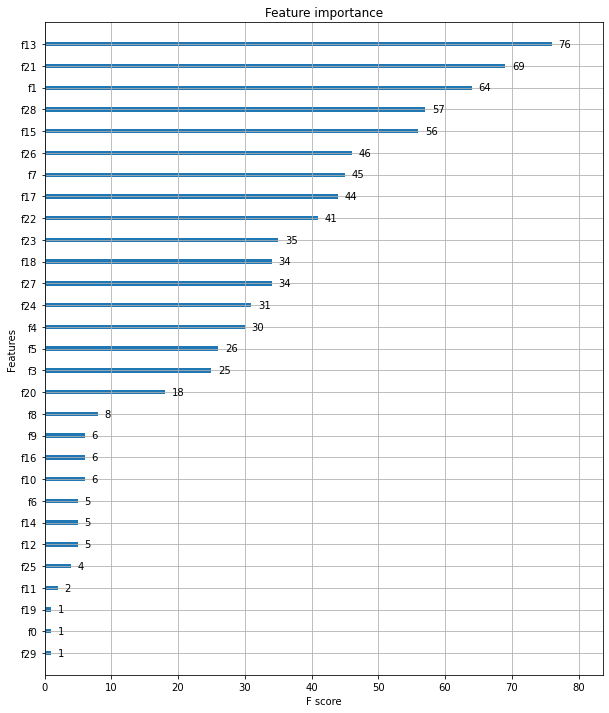

In [38]:
fig, ax = plt.subplots(figsize = (10,12))

plot_importance(xgb_model, ax = ax )

plot_importance() 함수는 피처의 중요도를 막대그래프로 시각화 

In [39]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

[15:56:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
get_clf_eval(y_test, w_preds)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737 , 정밀도 : 0.9744, 재현율 : 0.9870, F1 : 0.9806, auc : 0.9665


## LightGBM

XGBoost에 비해 학습에 걸리는 시간이 훨씬 적지만 적은 데이터 세트 일 경우 과적합이 생기기 쉬움.  
일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할 방식을 사용.
* 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할 방식 사용 
최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이 최소화 가능. 

최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국른 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM 구현 사상 

#### LightGBM 하이퍼파라미터 및 튜닝 

주요 파라미터 
* num_iterations : 반복수행하려는 트리의 개수 지정 ( = n_estimators ) 
* learning_rate : 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값 
* max_depth
* min_data_in_leaf : 결정트리의 min_samples_leaf 와 같은 파라미터 ( = min_child_samples)
* num_leaves : 하나의 트리가 가질 수 있는 최대 리프 개수 
* boosting :  부스팅 트리를 생성하는 알고리즘 
    - gbdt : 일반적인 그래디언트 부스팅 결정 트리
    - rf : 랜던 포레스트 
* bagging_fraction : 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정 (= sub_sample )
* feature_fraction : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율 ( = colsample_bytree)
* lambda_l2 : L2 regulation 제어를 위한 값 (= reg_lambda)
* lambda_l1 : L1 regulation 제어를 위한 값 (= reg_alpha)


Learning Task 파라미터 
* objective : 손실함수 정의, XGB 와 동일 

In [41]:
import lightgbm

In [43]:
from lightgbm import LGBMClassifier

In [46]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400 )

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss',
                eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [47]:
get_clf_eval(y_test,preds)

오차행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561 , 정밀도 : 0.9500, 재현율 : 0.9870, F1 : 0.9682, auc : 0.9395


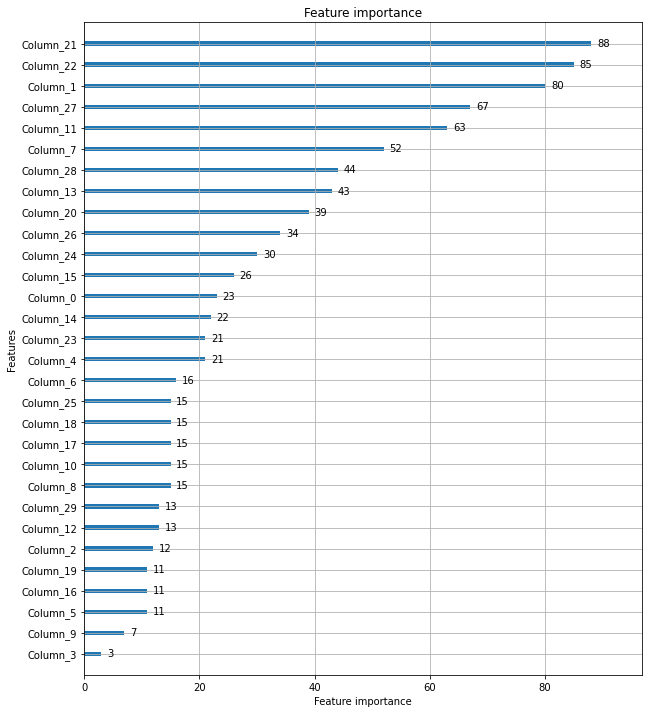

In [49]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize = (10,12))

plot_importance(lgbm_wrapper, ax= ax )